In [1]:
from google.colab import files
uploaded = files.upload()

Saving Train_Data.csv to Train_Data.csv


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('Train_Data.csv')
df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [37]:
df['PAQ605'].value_counts()

,count
PAQ605,
2.0,1606
1.0,346
7.0,1


In [38]:
df['DIQ010'].value_counts()

,count
DIQ010,
2.0,1879
3.0,50
1.0,19


In [39]:
df['RIAGENDR'] = df['RIAGENDR'].astype('category')
df['PAQ605'] = df['PAQ605'].astype('category')
df['DIQ010'] = df['DIQ010'].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SEQN       1954 non-null   float64 
 1   RIAGENDR   1948 non-null   category
 2   PAQ605     1953 non-null   category
 3   BMXBMI     1948 non-null   float64 
 4   LBXGLU     1953 non-null   float64 
 5   DIQ010     1948 non-null   category
 6   LBXGLT     1955 non-null   float64 
 7   LBXIN      1957 non-null   float64 
 8   age_group  1952 non-null   object  
dtypes: category(3), float64(5), object(1)
memory usage: 98.4+ KB


In [41]:
df.describe()

,SEQN,BMXBMI,LBXGLU,LBXGLT,LBXIN
count,1954.000000,1948.000000,1953.000000,1955.000000,1957.000000
mean,78683.621801,27.965400,99.491039,115.150384,11.862892
std,2924.115709,7.327616,16.774665,46.271615,9.756713
min,73564.000000,14.500000,63.000000,40.000000,0.140000
25%,76194.000000,22.800000,91.000000,87.000000,5.800000
50%,78717.000000,26.800000,97.000000,105.000000,9.030000
75%,81217.000000,31.300000,104.000000,131.000000,14.480000
max,83727.000000,70.100000,405.000000,604.000000,102.290000


In [42]:
df.age_group.value_counts()

,count
age_group,
Adult,1638
Senior,314


The data is imbalanced

In [43]:
df.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


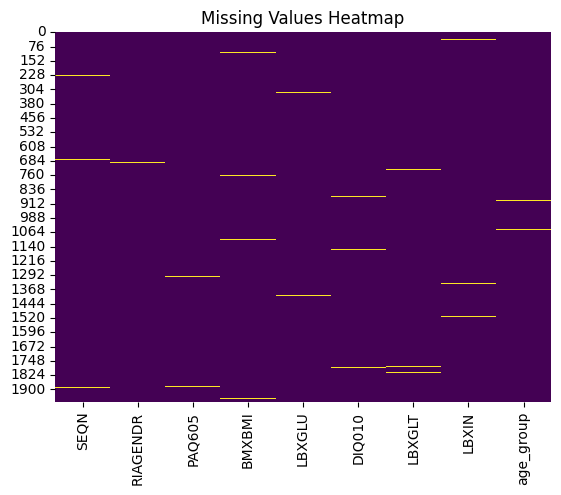

In [44]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [45]:
df = df.drop(columns=['SEQN'])
df = df.dropna(subset=['age_group'])

In [46]:
cat_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [49]:
num_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [50]:
df.isnull().sum()

,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0
age_group,0


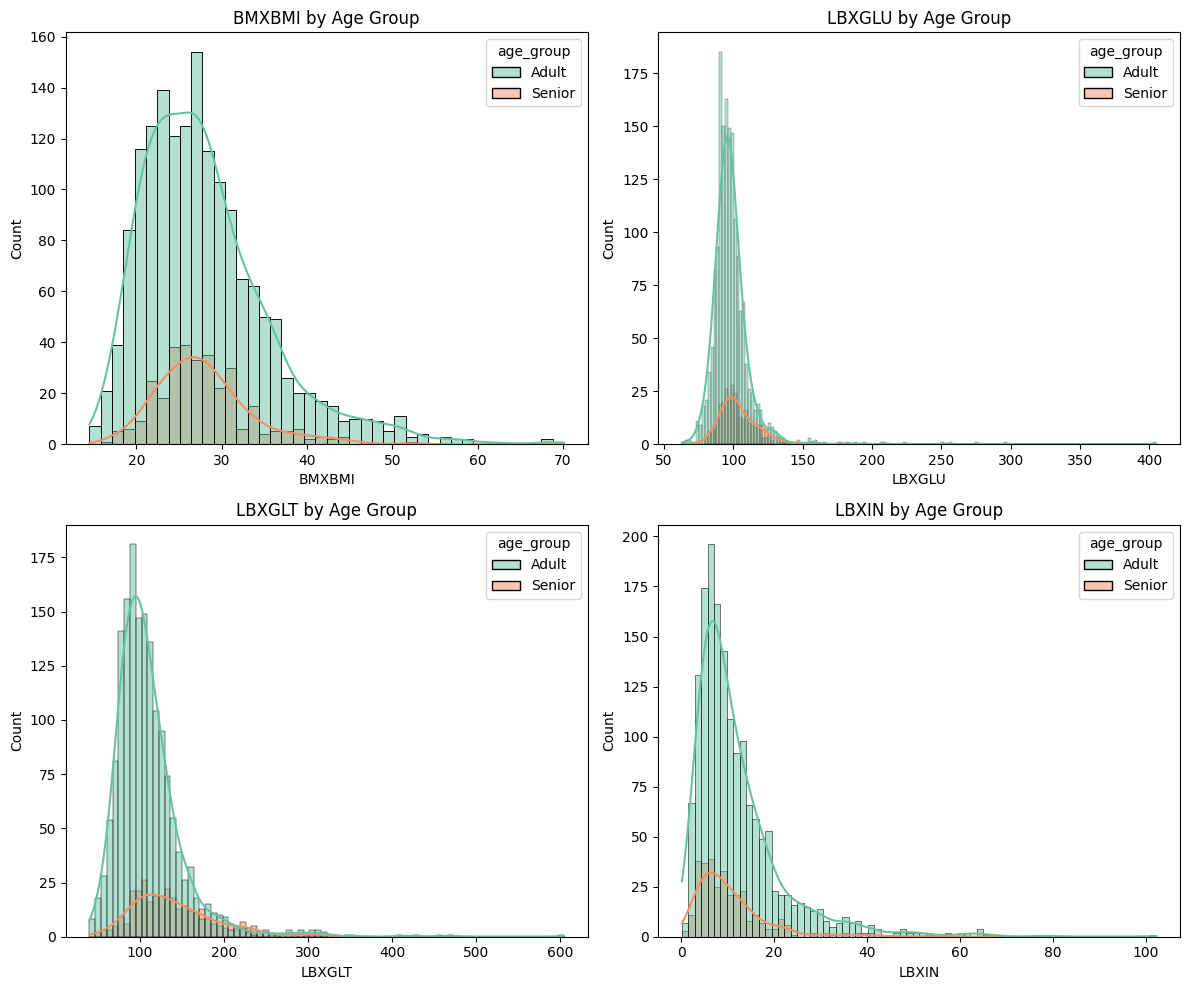

In [52]:
numeric_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, hue='age_group', kde=True, palette='Set2')
    plt.title(f"{col} by Age Group")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

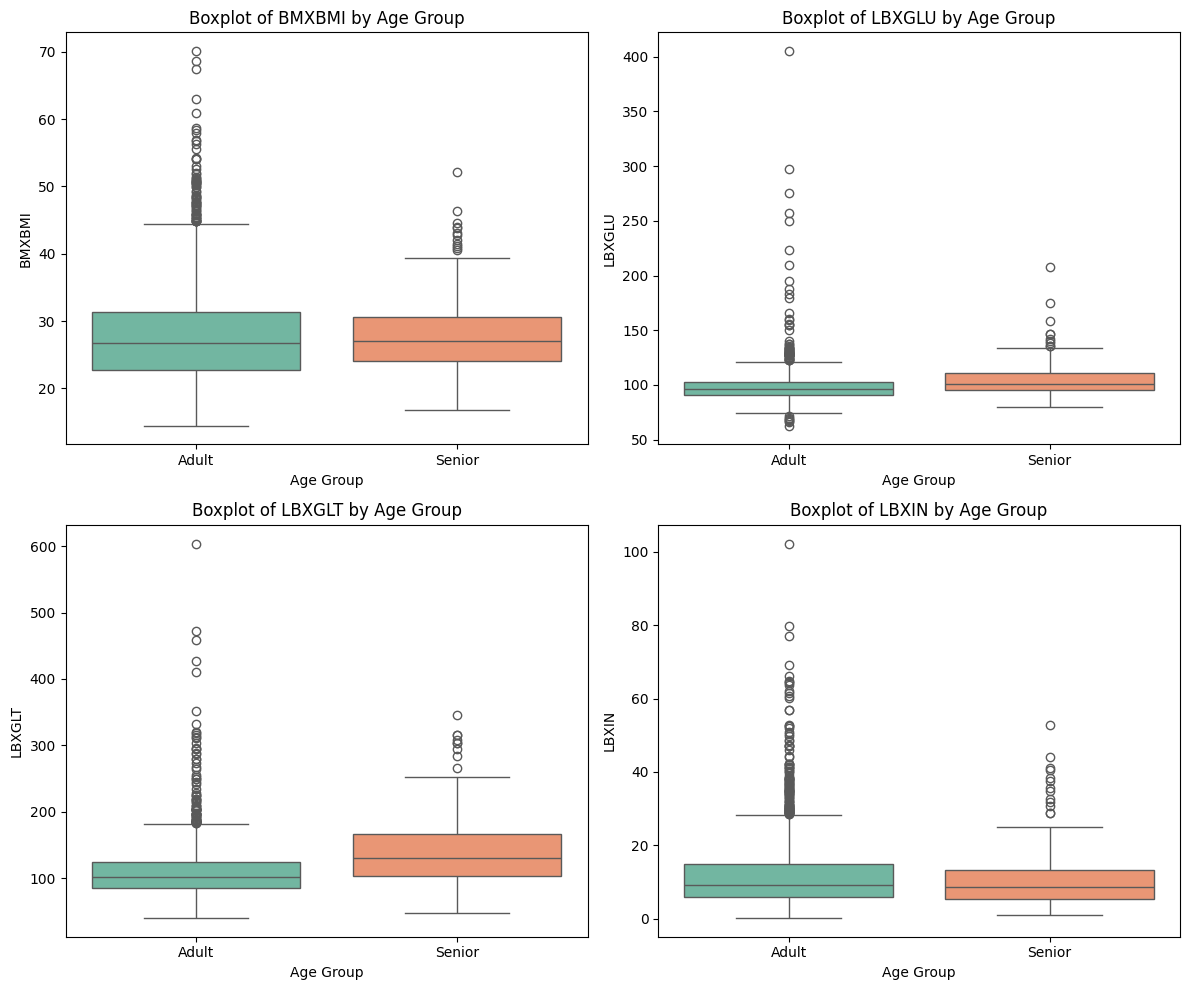

In [55]:
numeric_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='age_group', y=col, data=df, hue='age_group', palette='Set2')
    plt.title(f"Boxplot of {col} by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

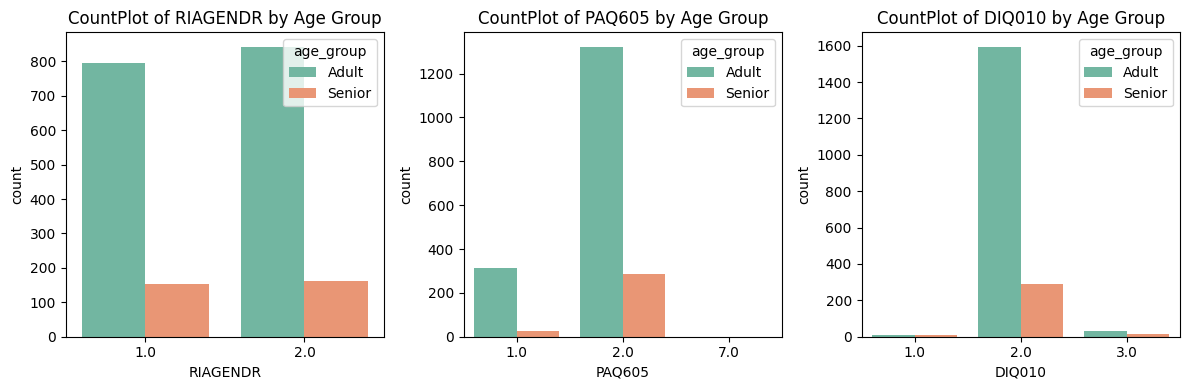

In [64]:
categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']

plt.figure(figsize=(12, 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df, hue='age_group', palette='Set2')
    plt.title(f"CountPlot of {col} by Age Group")
    plt.xlabel(f"{col}")

plt.tight_layout()
plt.show()

In [73]:
df['PAQ605'] = pd.to_numeric(df['PAQ605'], errors='coerce')
df = df[df['PAQ605'] != 7.0]
df['PAQ605'].value_counts()
df['PAQ605'] = df['PAQ605'].astype('category')

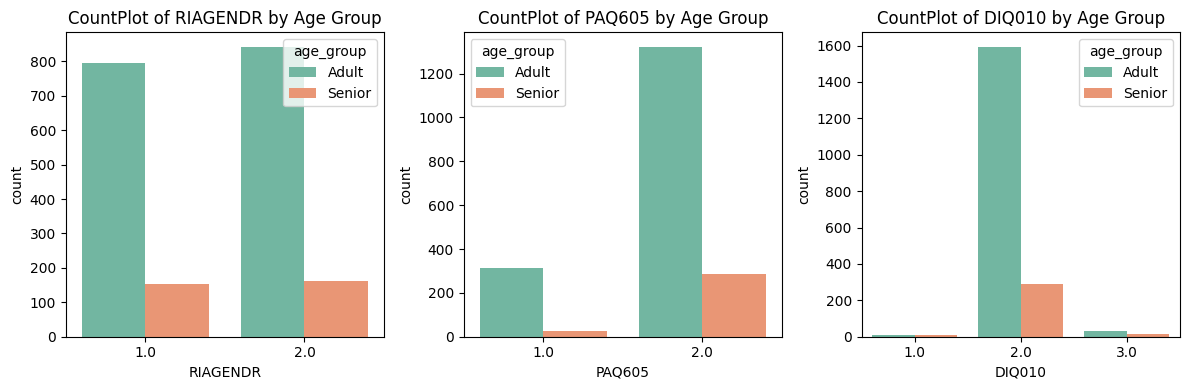

In [74]:
plt.figure(figsize=(12, 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df, hue='age_group', palette='Set2')
    plt.title(f"CountPlot of {col} by Age Group")
    plt.xlabel(f"{col}")

plt.tight_layout()
plt.show()

In [79]:
male_pct_adults = (len(df.loc[(df['RIAGENDR']==1.0) & (df['age_group']=='Adult')])/len(df.loc[df['age_group']=='Adult']))*100
female_pct_adults = (len(df.loc[(df['RIAGENDR']==2.0) & (df['age_group']=='Adult')])/len(df.loc[df['age_group']=='Adult']))*100
print(f"Percentage of Males in Adults: {male_pct_adults:.2f}%")
print(f"Percentage of Females in Adults: {female_pct_adults:.2f}%")

Percentage of Males in Adults: 48.56%
Percentage of Females in Adults: 51.44%


In [80]:
male_pct_seniors = (len(df.loc[(df['RIAGENDR']==1.0) & (df['age_group']=='Senior')])/len(df.loc[df['age_group']=='Senior']))*100
female_pct_seniors = (len(df.loc[(df['RIAGENDR']==2.0) & (df['age_group']=='Senior')])/len(df.loc[df['age_group']=='Senior']))*100
print(f"Percentage of Males in Seniors: {male_pct_seniors:.2f}%")
print(f"Percentage of Females in Seniors: {female_pct_seniors:.2f}%")

Percentage of Males in Seniors: 48.73%
Percentage of Females in Seniors: 51.27%


In [81]:
pct_seniors_doing_physical_activity = (len(df.loc[(df['PAQ605']==1.0) & (df['age_group']=='Senior')])/len(df.loc[df['age_group']=='Senior']))*100
pct_seniors_not_doing_physical_activity = (len(df.loc[(df['PAQ605']==2.0) & (df['age_group']=='Senior')])/len(df.loc[df['age_group']=='Senior']))*100
print(f"Percentage of Seniors doing physical activity: {pct_seniors_doing_physical_activity:.2f}%")
print(f"Percentage of Seniors not doing physical activity: {pct_seniors_not_doing_physical_activity:.2f}%")

Percentage of Seniors doing physical activity: 8.92%
Percentage of Seniors not doing physical activity: 91.08%


In [82]:
pct_adults_doing_physical_activity = (len(df.loc[(df['PAQ605']==1.0) & (df['age_group']=='Adult')])/len(df.loc[df['age_group']=='Adult']))*100
pct_adults_not_doing_physical_activity = (len(df.loc[(df['PAQ605']==2.0) & (df['age_group']=='Adult')])/len(df.loc[df['age_group']=='Adult']))*100
print(f"Percentage of Adults doing physical activity: {pct_adults_doing_physical_activity:.2f}%")
print(f"Percentage of Adults not doing physical activity: {pct_adults_not_doing_physical_activity:.2f}%")

Percentage of Adults doing physical activity: 19.24%
Percentage of Adults not doing physical activity: 80.76%


In [86]:
# Seniors
pct_seniors_with_diabetes = (len(df.loc[(df['DIQ010'] == 1.0) & (df['age_group'] == 'Senior')]) / len(df.loc[df['age_group'] == 'Senior'])) * 100
pct_seniors_without_diabetes = (len(df.loc[(df['DIQ010'] == 2.0) & (df['age_group'] == 'Senior')]) / len(df.loc[df['age_group'] == 'Senior'])) * 100
pct_seniors_borderline = (len(df.loc[(df['DIQ010'] == 3.0) & (df['age_group'] == 'Senior')]) / len(df.loc[df['age_group'] == 'Senior'])) * 100

# Adults
pct_adults_with_diabetes = (len(df.loc[(df['DIQ010'] == 1.0) & (df['age_group'] == 'Adult')]) / len(df.loc[df['age_group'] == 'Adult'])) * 100
pct_adults_without_diabetes = (len(df.loc[(df['DIQ010'] == 2.0) & (df['age_group'] == 'Adult')]) /  len(df.loc[df['age_group'] == 'Adult'])) * 100
pct_adults_borderline = (len(df.loc[(df['DIQ010'] == 3.0) & (df['age_group'] == 'Adult')]) / len(df.loc[df['age_group'] == 'Adult'])) * 100

In [87]:
print(f"Percentage of Seniors with diabetes: {pct_seniors_with_diabetes:.2f}%")
print(f"Percentage of Seniors without diabetes: {pct_seniors_without_diabetes:.2f}%")
print(f"Percentage of Seniors who are borderline: {pct_seniors_borderline:.2f}%")

print(f"\nPercentage of Adults with diabetes: {pct_adults_with_diabetes:.2f}%")
print(f"Percentage of Adults without diabetes: {pct_adults_without_diabetes:.2f}%")
print(f"Percentage of Adults who are borderline: {pct_adults_borderline:.2f}%")

Percentage of Seniors with diabetes: 2.55%
Percentage of Seniors without diabetes: 92.36%
Percentage of Seniors who are borderline: 5.10%

Percentage of Adults with diabetes: 0.67%
Percentage of Adults without diabetes: 97.31%
Percentage of Adults who are borderline: 2.02%


###  1. Gender Distribution (RIAGENDR)

 **Insight**:  
Gender distribution is nearly equal in both adults and seniors. This suggests gender is not skewed and likely won't introduce bias in the model. It may still interact with other features but isn't a dominant factor on its own.

---

### 2. Physical Activity (PAQ605)

 **Insight**:  
Seniors are less than half as likely to engage in physical activity compared to adults. This shows a clear decline in physical activity with age, making it a potentially strong indicator of being a senior.

---

###  3. Diabetes Status (DIQ010)

 **Insight**:  
The rate of diagnosed diabetes and borderline cases is significantly higher in seniors than in adults. This shows a strong age-related trend and suggests that diabetes is a valuable feature for classification.

---

###  Final Summary

- Gender is **balanced** across age groups — likely neutral on its own.
- Physical activity and diabetes status both show clear **age-related health declines**.
- These trends suggest that **PAQ605 (activity)** and **DIQ010 (diabetes)** are **meaningful features** for predicting if a person is a senior.

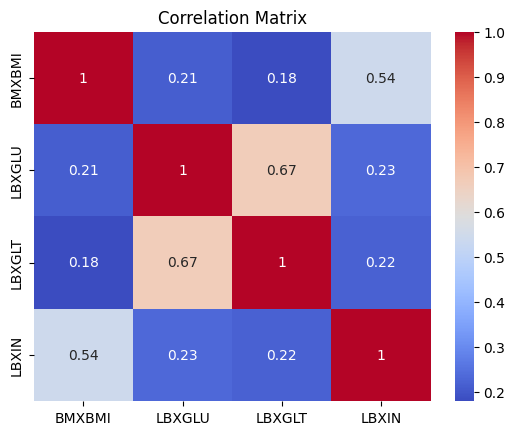

In [88]:
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [91]:
df['age_group'] = df['age_group'].map({'Adult': 0, 'Senior': 1})

In [107]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['age_group', 'RIAGENDR'])  # Drop target
y = df['age_group']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [108]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [117]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train_bal, y_train_bal)

# Predict
y_pred = model1.predict(X_val)
print("F1 Score:", f1_score(y_val, y_pred))

F1 Score: 0.36666666666666664


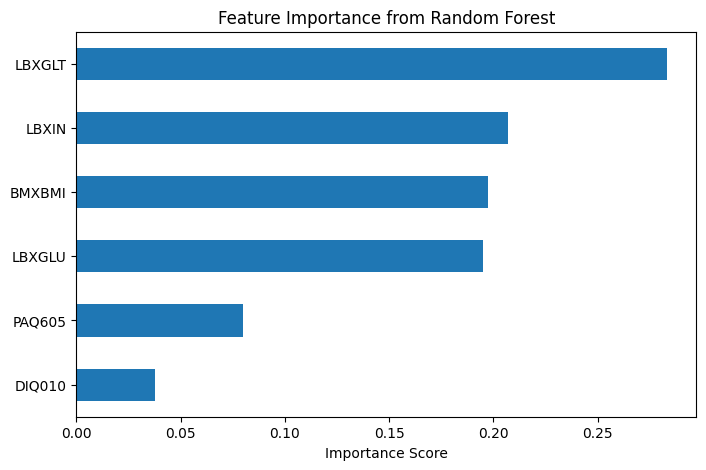

In [118]:
# Get feature importance
importances = model1.feature_importances_
features = X.columns

# Create a Series for plotting
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.show()

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # or 'mean'
X_train_bal = imputer.fit_transform(X_train_bal)
X_val = imputer.transform(X_val)
model2 = GradientBoostingClassifier(random_state=42)
model2.fit(X_train_bal, y_train_bal)

# Predict
y_pred = model2.predict(X_val)
print("F1 Score:", f1_score(y_val, y_pred))

F1 Score: 0.3803680981595092


In [122]:
from xgboost import XGBClassifier
model3 = XGBClassifier(random_state=42)
model3.fit(X_train_bal, y_train_bal)

# Predict
y_pred = model3.predict(X_val)
print("F1 Score:", f1_score(y_val, y_pred))

F1 Score: 0.45528455284552843


In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, scoring='f1', cv=5)
grid.fit(X_train_bal, y_train_bal)

print("Best Params:", grid.best_params_)
print("Best F1 Score (CV):", grid.best_score_)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Best F1 Score (CV): 0.854229187481683


In [124]:
best_model = XGBClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=150,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model on SMOTE-balanced training set
best_model.fit(X_train_bal, y_train_bal)

# Predict on validation set
y_pred = best_model.predict(X_val)

# Evaluate using F1 score
f1 = f1_score(y_val, y_pred)
print(f"F1 Score on Validation Set: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:48:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score on Validation Set: 0.4179


In [126]:
from google.colab import files
uploaded = files.upload()

Saving Test_Data.csv to Test_Data.csv


In [133]:
test = pd.read_csv('Test_Data.csv')
test.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [134]:
test.isnull().sum()

,0
SEQN,2
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [135]:
df['RIAGENDR'] = df['RIAGENDR'].astype('category')
df['PAQ605'] = df['PAQ605'].astype('category')
df['DIQ010'] = df['DIQ010'].astype('category')

In [136]:
test = test.drop(columns=['SEQN'])

In [137]:
cat_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
for col in cat_cols:
    test[col] = test[col].fillna(test[col].mode()[0])
num_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
for col in num_cols:
    test[col] = test[col].fillna(test[col].median())

In [138]:
test.isnull().sum()

,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0


In [139]:
test['PAQ605'] = pd.to_numeric(test['PAQ605'], errors='coerce')
test = test[test['PAQ605'] != 7.0]
test['PAQ605'].value_counts()
test['PAQ605'] = test['PAQ605'].astype('category')

In [141]:
# Step 1: Prepare test data
X_test = test.drop(columns=['RIAGENDR'])
X_test = imputer.transform(X_test)

# Step 2: Predict with best model
y_test_pred = best_model.predict(X_test)

# Step 3: Create submission file
submission = pd.DataFrame({'age_group': y_test_pred})
submission.to_csv('submission.csv', index=False)